In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt

## Distribuição de frequências
___

* O DF abaixo contém os dados sobre altura e quantidade de filhos das entrevistadas.


* Ler Banco de dados

In [3]:
data = pd.read_csv('https://filipezabala.com/data/hospital.csv')

## Distribuição de frequências discreta: número de filhos

* Mostrar Dados:

In [4]:
data.head()

,children,height
0,2,1.59
1,0,1.58
2,1,1.70
3,2,1.62
4,4,1.67


* Agrupar dados por quantidade de filhos

In [5]:
data = data.groupby('children')['children'].count()
data

,children
children,
0,11
1,27
2,30
3,19
4,11
5,1
6,1


* Transformar os dados resultantes em data frame:

In [6]:
data = pd.DataFrame(data)
data

,children
children,
0,11
1,27
2,30
3,19
4,11
5,1
6,1


* Renomear a coluna de contagem:

In [7]:
data = data.rename(columns={'children':'freq'})
data

,freq
children,
0,11
1,27
2,30
3,19
4,11
5,1
6,1


* Resetar index:

In [8]:
data.reset_index(inplace=True)
data

,children,freq
0,0,11
1,1,27
2,2,30
3,3,19
4,4,11
5,5,1
6,6,1


* Calcular índice de frequência relativa:

In [9]:
data['freq_rel'] = (data['freq']/sum(data['freq']))
data

,children,freq,freq_rel
0,0,11,0.11
1,1,27,0.27
2,2,30,0.30
3,3,19,0.19
4,4,11,0.11
5,5,1,0.01
6,6,1,0.01


* Calcular índice de frequência acumulada:

In [10]:
data['Freq_acu'] = data['freq'].cumsum()
data

,children,freq,freq_rel,Freq_acu
0,0,11,0.11,11
1,1,27,0.27,38
2,2,30,0.30,68
3,3,19,0.19,87
4,4,11,0.11,98
5,5,1,0.01,99
6,6,1,0.01,100


* Calcular índice de frequência relativa acumulada:

In [11]:
data['Freq_rel_acu'] = data['freq_rel'].cumsum()
data

,children,freq,freq_rel,Freq_acu,Freq_rel_acu
0,0,11,0.11,11,0.11
1,1,27,0.27,38,0.38
2,2,30,0.30,68,0.68
3,3,19,0.19,87,0.87
4,4,11,0.11,98,0.98
5,5,1,0.01,99,0.99
6,6,1,0.01,100,1.00


* Calcular índice de frequência acumluda inversa

In [12]:
data['Freq_acu_inv'] = data.loc[::-1, 'freq'].cumsum()[::-1]
data

,children,freq,freq_rel,Freq_acu,Freq_rel_acu,Freq_acu_inv
0,0,11,0.11,11,0.11,100
1,1,27,0.27,38,0.38,89
2,2,30,0.30,68,0.68,62
3,3,19,0.19,87,0.87,32
4,4,11,0.11,98,0.98,13
5,5,1,0.01,99,0.99,2
6,6,1,0.01,100,1.00,1


* Calcular índice de frequência acumulada relativa

In [13]:
data['Freq_rel__acu_inv'] = data.loc[::-1, 'freq_rel'].cumsum()[::-1]
data

,children,freq,freq_rel,Freq_acu,Freq_rel_acu,Freq_acu_inv,Freq_rel__acu_inv
0,0,11,0.11,11,0.11,100,1.00
1,1,27,0.27,38,0.38,89,0.89
2,2,30,0.30,68,0.68,62,0.62
3,3,19,0.19,87,0.87,32,0.32
4,4,11,0.11,98,0.98,13,0.13
5,5,1,0.01,99,0.99,2,0.02
6,6,1,0.01,100,1.00,1,0.01


## Distribuição de frequência contínua: Altura

* Mesmo Banco de dados:

In [38]:
data = pd.read_csv('https://filipezabala.com/data/hospital.csv')

* Quando a variável é contínua, é preciso determinar: **Amplitude (C) e Quantidade de classes (k)**

### Propostas para determinação de classes reconhecidas na literatura:

#### Método Sturges (amplitudade)


* Número de observações:

In [15]:
n = len(data['height'])
n

100

* Amplitude:

In [16]:
R = max(data['height']) - min(data['height'])
R

0.22999999999999998

* Intervalo (C):

In [17]:
C = R/(1+np.log2(n))
C

0.030089524748996937

* Quantidade de classes (k):

In [18]:
(1+np.log2(n))

7.643856189774724

#### Metodo Scott (desvio padrão)

* n:

In [19]:
n = len(data['height'])
n

100

* Amplitude:

In [20]:
R = max(data['height']) - min(data['height'])
R

0.22999999999999998

* Desvio padrão amostral:

In [21]:
s = np.std(data['height'])
s

0.045041647394383745

* Intervalo (C):

In [22]:
C = 3.49*s/n**(1/3)
C

0.033866711387282956

* Quantidade de classes (k):

In [23]:
k = R/C
k

6.791329614789985

#### Método Freedman-Diaconis (amplitude interquartílica)

* n

In [24]:
n = len(data['height'])
n

100

* R

In [25]:
R = max(data['height']) - min(data['height'])
R

0.22999999999999998

* Primeiro e terceiro quartis

In [26]:
Q1 = np.quantile(data['height'], 0.25)
Q3 = np.quantile(data['height'], 0.75)
Q = (Q1,Q3)
print(Q)

(1.5975000000000001, 1.65)


* Amplitude interquartílica (IQR):

In [27]:
IQR = Q3-Q1
IQR

0.05249999999999977

* Intervalo (C):

In [28]:
C = 2 * IQR / (n**(1/3))
C

0.022621564245334683

* Quantidade de classes (k):

In [29]:
k = R/C
k

10.167289826008986

#### Gráficos

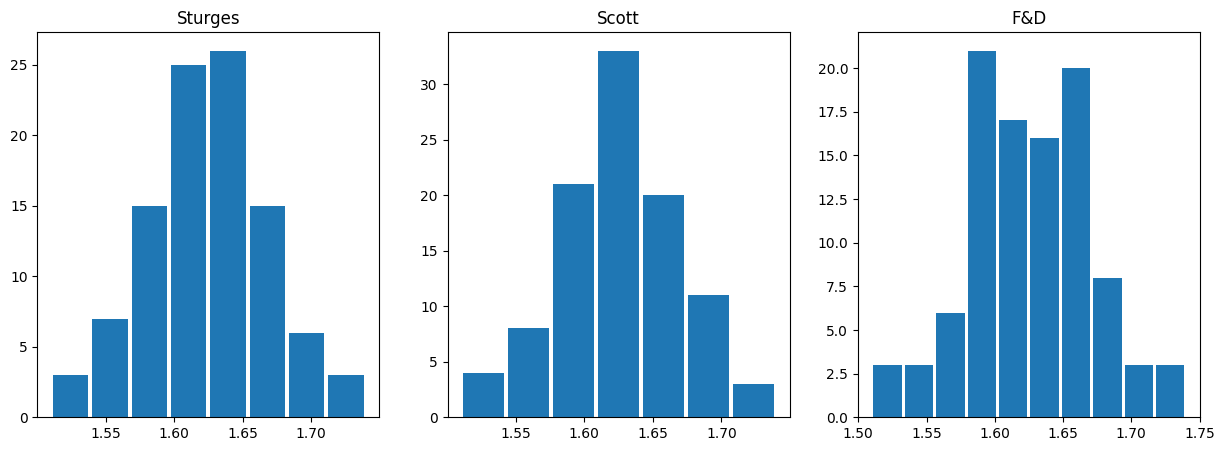

In [49]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

ax1.hist(data['height'], bins=8, rwidth=0.9)
ax1.set_title('Sturges')

ax2.hist(data['height'], bins=7, rwidth=0.9)
ax2.set_title('Scott')

ax3.hist(data['height'], bins=10, rwidth=0.9)
ax3.set_title('F&D')

plt.show()

#### Para amostras mais de 200 observações, a regra de Sturges perde eficiência. Portanto as regras de Scott e Freedman-Diaconis são melhor fundamentadas na teoria estatística.

* Simulação para amostras maiores

In [46]:
 def NC(x):
  n = len(x)
  # Sturges (1926)
  k_sturges = math.ceil(1 + 3.322 * math.log10(n))
  # Scott (1979)
  R = np.ptp(x)
  s = np.std(x, ddof=1)
  C_scott = 3.49 * s / n**(1/3)
  k_scott = math.ceil(R / C_scott)
  # Freedman-Diaconis (1981)
  Q1 = np.quantile(x, 0.25)
  Q3 = np.quantile(x, 0.75)
  IQR = Q3 - Q1
  C_FD = 2 * IQR / n**(1/3)
  k_FD = math.ceil(R / C_FD)

  return {
      'i': i,
      'n': n,
      'Sturges': k_sturges,
      'Scott': k_scott,
      'FD': k_FD
  }

for i in range(1, 7):
  np.random.seed(i)
  x = np.random.normal(size=10**i)
  print(NC(x))

{'i': 1, 'n': 10, 'Sturges': 5, 'Scott': 2, 'FD': 4}
{'i': 2, 'n': 100, 'Sturges': 8, 'Scott': 7, 'FD': 10}
{'i': 3, 'n': 1000, 'Sturges': 11, 'Scott': 19, 'FD': 24}
{'i': 4, 'n': 10000, 'Sturges': 15, 'Scott': 49, 'FD': 62}
{'i': 5, 'n': 100000, 'Sturges': 18, 'Scott': 112, 'FD': 144}
{'i': 6, 'n': 1000000, 'Sturges': 21, 'Scott': 270, 'FD': 349}


#### Criar tabela de dados discretizados

* Ler banco de dados:

In [41]:
data = pd.read_csv('https://filipezabala.com/data/hospital.csv')

* Método Sturges:

In [43]:
n = len(data['height'])
n

100

* Número de classes:

In [44]:
(1+np.log2(n))

7.643856189774724

* Amplitude:

In [32]:
R = max(data['height']) - min(data['height'])
R

0.22999999999999998

* Intervalo:

In [33]:
C = R/(1+np.log2(n))
C

0.030089524748996937

* Definindo função:

In [34]:
def split(x):
  if x <= data['height'].min() + C:
    return 'group_1'
  if x <= data['height'].min() + 2*C:
    return 'group_2'
  if x <= data['height'].min() + 3*C:
    return 'group_3'
  if x <= data['height'].min() + 4*C:
    return 'group_4'
  if x <= data['height'].min() + 5*C:
    return 'group_5'
  if x <= data['height'].min() + 6*C:
    return 'group_6'
  if x <= data['height'].min() + 7*C:
    return 'group_7'
  else:
    return 'group_8'

* Aplicando função:

In [35]:
data['group'] = data['height'].apply(split)
data

,children,height,group
0,2,1.59,group_3
1,0,1.58,group_3
2,1,1.70,group_7
3,2,1.62,group_4
4,4,1.67,group_6
...,...,...,...
95,1,1.59,group_3
96,0,1.65,group_5
97,0,1.63,group_4
98,3,1.70,group_7


* Simulação

* Preceba que a partir de 100 observações o método de Sturges acaba ficando defasado, em relação aos métodos de Scott e Freedman-Diaconis.

* Gráfico

In [36]:
data = data.groupby('group')['group'].count()
data

,group
group,
group_1,4
group_2,8
group_3,21
group_4,22
group_5,28
group_6,11
group_7,4
group_8,2
